In [41]:
import scipy
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
import os
from scipy.io import loadmat, savemat
from matplotlib.colors import LogNorm
import time


In [42]:
# def GetPeakCurrentData(filepath):
#     firstFile = loadmat(filepath + all2015Files[0]).get("flashes")
#     concat= firstFile[:,4]
#     for fileName in all2015Files[1:]:
#         mat_contents=loadmat(filepath+fileName, variable_names=['flashes']).get("flashes")
#         concat = np.concatenate((concat,mat_contents[:,4]))
#     np.save("all2015Data", concat)

In [77]:
filepath = '/Volumes/lairdata/lightningdata/From Alexandria/GLD_cleaned/Matlab/2015/GLD-201512310000-cleaned.mat'
mat = loadmat(filepath).get("flashes")
#peak_current = np.load('all2015Data.npy')

In [78]:
def plot1DHist(peak_current):
    fig, ax = plt.subplots(figsize =(10, 8), tight_layout = True)
    ax.grid(color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.6)
    ax.set_yscale('log')
    #colors = ['aqua', 'red', 'gold', 'royalblue', 'darkorange', 'green', 'purple', 'cyan', 'yellow', 'lime']
    #cnts, values, bars = ax.hist(peak_current, bins = 20)
    plt.axvline(np.median(peak_current), color='k', linestyle='dashed', linewidth=1, label = "Median Peak Current [kA]: {}, Mean: {}".format(np.median(peak_current), np.mean(peak_current)))
    
    # This is  the colormap I'd like to use.
    cm = plt.cm.plasma
    # Get the histogram
    Y,X = np.histogram(peak_current, 30)
    x_span = X.max()-X.min()
    C = [cm(((x-X.min())/x_span)) for x in X]

    plt.style.use('seaborn-dark')
    plt.bar(X[:-1],Y,color=C,width=X[1]-X[0])
    plt.xlabel("Peak Current [kA]", fontsize = 20, color="black")
    plt.ylabel("Frequency", fontsize = 20, color="black")
    plt.title("Frequency of Peak Currents (12/31)", fontsize = 20, color="black")
    plt.legend()
    
    plt.savefig('Frequency', facecolor='w') # saving plot
    plt.show();

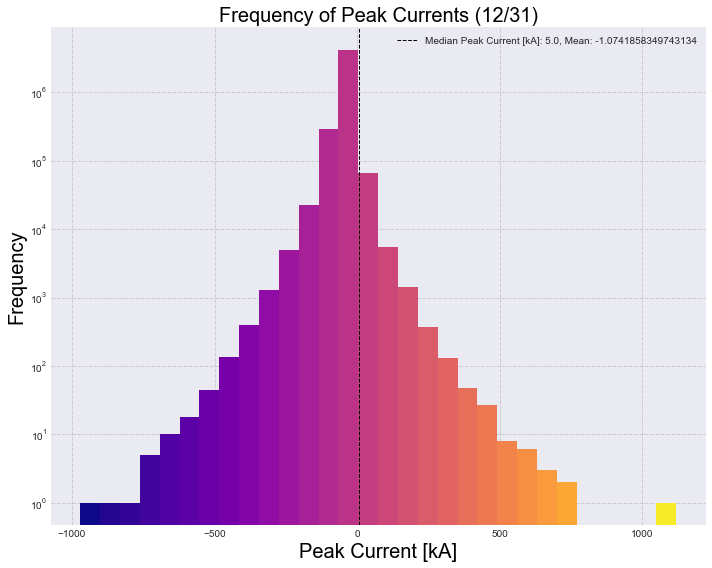

In [79]:
plot1DHist(mat[:,4])